I wanted to analyze the data from the last presidential election in Mexico, where the counting of the votes officially ended this July 8th. 

I got the database from the Mexican National Electoral Institute, which showed the vote in 156,841 districts of the country, and grouped it to only show the sums per each one of the 31 states.

So far, I can make four different graphs -one per each candidate and the parties that sponsored them- showing how many people voted for a certain party or coalition, how many canceled their vote or voted for a non-registered candidate.

From the graphs, it's possible to see that three parties were the most voted: the leftist Morena, the right-wing PAN and PRI, the party currently in power. Parties like Encuentro Social and Nueva Alianza were barely voted and are currently on the verge of dissapearing from the political landscape.

One can also see that some people actually voted for independent candidate Margarita Zavala, who was no longer in the competition but whose name wasn't erased from the ballots. In some states, there were more cancelled votes than votes for the independent candidate Jaime Rodríguez.

It would be nice to have better graphs, since the ones I currently have it's confusing to understand the diversity of the votes per state. Maybe I shouldn't graph the results per state? 

My goal is to have one choropleth map that shows the party that won on each district. Maybe a nice gif which shows the change in the map for the last three presidential elections.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('presidencia.csv')
df.head(50)

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,NOMBRE_ESTADO,ID_DISTRITO,NOMBRE_DISTRITO,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,CAND_IND_02,CNR,VN,TOTAL_VOTOS_CALCULADOS,LISTA_NOMINAL_CASILLA,OBSERVACIONES,MECANISMOS_TRASLADO,FECHA_HORA,Unnamed: 42,Unnamed: 43
0,'010000M0100',010000M0100256810,1,AGUASCALIENTES,0,,0,1,M,0,...,26,5,9,837,1683,-,-,05/07/18 14:00:00.000000,NaN,NaN
1,'010338B0100',010338B0100442,1,AGUASCALIENTES,1,JES�S MAR�A,338,1,B,0,...,14,0,20,337,587,Cotejo (Levantada en Casilla),F,04/07/18 09:23:10.081000,NaN,NaN
2,'010338C0100',010338C0100876,1,AGUASCALIENTES,1,JES�S MAR�A,338,1,C,0,...,18,0,6,335,586,Cotejo (Levantada en Casilla),F,04/07/18 09:26:33.092000,NaN,NaN
3,'010338C0200',010338C02001238,1,AGUASCALIENTES,1,JES�S MAR�A,338,2,C,0,...,13,0,7,305,586,Cotejo (Levantada en Casilla),F,04/07/18 09:31:31.102000,NaN,NaN
4,'010339B0100',010339B0100443,1,AGUASCALIENTES,1,JES�S MAR�A,339,1,B,0,...,14,0,6,328,552,Cotejo (Levantada en Casilla),F-D,04/07/18 09:34:53.187000,NaN,NaN
5,'010339C0100',010339C01001048,1,AGUASCALIENTES,1,JES�S MAR�A,339,1,C,0,...,14,0,14,319,552,Cotejo (Levantada en Casilla),F-D,04/07/18 09:37:51.863000,NaN,NaN
6,'010339C0200',010339C02001167,1,AGUASCALIENTES,1,JES�S MAR�A,339,2,C,0,...,11,0,13,312,552,Recuento (Para recuento (SRA)),F-D,04/07/18 12:31:28.229000,NaN,NaN
7,'010340B0100',010340B0100444,1,AGUASCALIENTES,1,JES�S MAR�A,340,1,B,0,...,16,1,13,380,563,Cotejo (Levantada en Casilla),F-D,04/07/18 09:40:55.686000,NaN,NaN
8,'010340C0100',010340C01001386,1,AGUASCALIENTES,1,JES�S MAR�A,340,1,C,0,...,9,0,8,342,563,Cotejo (Levantada en Casilla),F-D,04/07/18 09:43:47.712000,NaN,NaN
9,'010340C0200',010340C02001188,1,AGUASCALIENTES,1,JES�S MAR�A,340,2,C,0,...,7,0,13,344,562,Cotejo (Levantada en Casilla),F-D,04/07/18 09:46:46.667000,NaN,NaN


In [32]:
df = df.drop(columns=['CLAVE_CASILLA', 'CLAVE_ACTA', 'ID_DISTRITO', 'ID_CASILLA', 'NUM_ACTA_IMPRESO', 'FECHA_HORA', 'Unnamed: 42', 'Unnamed: 43', 'MECANISMOS_TRASLADO', 'OBSERVACIONES', 'EXT_CONTIGUA', 'TIPO_CASILLA'])

In [33]:
df.tail()

,ID_ESTADO,NOMBRE_ESTADO,NOMBRE_DISTRITO,SECCION,CASILLA,PAN,PRI,PRD,PVEM,PT,...,PT_MORENA_PES,PT_MORENA,PT_PES,MORENA_PES,CAND_IND_01,CAND_IND_02,CNR,VN,TOTAL_VOTOS_CALCULADOS,LISTA_NOMINAL_CASILLA
156835,32,ZACATECAS,GUADALUPE,1906,Urbana,60,34,0,2,24,...,12,2,1,1,0,28,0,4,444,663
156836,32,ZACATECAS,GUADALUPE,1907,Urbana,86,52,2,2,17,...,9,3,0,1,0,57,2,5,470,684
156837,32,ZACATECAS,GUADALUPE,1908,Urbana,49,54,0,3,10,...,6,3,0,2,0,30,0,6,342,519
156838,32,ZACATECAS,GUADALUPE,1908,Urbana,50,37,1,3,15,...,12,0,0,2,0,32,1,3,340,518
156839,32,ZACATECAS,GUADALUPE,1909,Urbana,20,14,1,0,6,...,0,0,0,1,0,16,0,2,128,236


In [42]:
df.to_csv('presidencial_limpia.csv', index=False)

In [48]:
import pg8000
conn = pg8000.connect(database="dianabaptistarojo",user="dianabaptistarojo")
print(type(conn))

<class 'pg8000.core.Connection'>


In [61]:
Anaya_results = []

cursor = conn.cursor()
myquery = "SELECT sum(PAN), sum(PRD), sum(MOVIMIENTO_CIUDADANO), sum(PAN_PRD_MC) , sum(PAN_PRD) , sum(PAN_MC) , sum(PRD_MC), ESTADO FROM presidencial_limpia GROUP BY ESTADO;"


##PAN , PRI , PRD , PVEM , PT , MOVIMIENTO CIUDADANO , NUEVA ALIANZA , MORENA , ENCUENTRO SOCIAL , PAN_PRD_MC , PAN_PRD , PAN_MC , PRD_MC , PRI-PVEM-NA, PRI_PVEM , PRI_NA , PVEM_NA , PT-MORENA-PES , PT_MORENA , PT_PES , MORENA_PES , CAND_IND_01 , CAND_IND_02 , CNR , VN 

cursor.execute(myquery)
for row in cursor:
    results_A = row
    Anaya_results.append(results_A)
    
    ##ONE PER PARTY AND ONE PER COALITION?

In [62]:
Anaya_results

[[162349, 7442, 4407, 3122, 974, 602, 92, 'AGUASCALIENTES'],
 [239038, 13090, 12004, 7277, 1811, 2031, 252, 'BAJA CALIFORNIA'],
 [51812, 1409, 1453, 1274, 479, 301, 66, 'BAJA CALIFORNIA SUR'],
 [43742, 4945, 3329, 1088, 429, 751, 133, 'CAMPECHE'],
 [100282, 55093, 35724, 3989, 1429, 1001, 599, 'CHIAPAS'],
 [379040, 15621, 17610, 7484, 2236, 3506, 422, 'CHIHUAHUA'],
 [928519, 252025, 37477, 50555, 15283, 5878, 2886, 'CIUDAD DE M�XICO'],
 [278832, 10799, 10531, 4132, 1243, 1880, 173, 'COAHUILA'],
 [46956, 2555, 4568, 1137, 692, 453, 67, 'COLIMA'],
 [165008, 7296, 8198, 4113, 1895, 1291, 146, 'DURANGO'],
 [844396, 41272, 29357, 15521, 4857, 4221, 509, 'GUANAJUATO'],
 [75457, 103088, 31119, 3627, 2249, 898, 1400, 'GUERRERO'],
 [141609, 27275, 10728, 5060, 2250, 848, 258, 'HIDALGO'],
 [806319, 31780, 295044, 23988, 3590, 16476, 2103, 'JALISCO'],
 [248702, 150247, 26269, 8940, 6048, 2278, 1321, 'MICHOAC�N'],
 [95411, 30115, 10657, 3372, 1166, 1438, 394, 'MORELOS'],
 [1207646, 206635, 65607, 

In [63]:
import numpy as np
col_names = ['PAN', 'PRD', 'MOVIMIENTO_CIUDADANO', 'PAN_PRD_MC' , 'PAN_PRD' , 'PAN_MC' , 'PRD_MC', 'ESTADO']
df_anaya = pd.DataFrame.from_records(Anaya_results, columns=col_names)
df_anaya

,PAN,PRD,MOVIMIENTO_CIUDADANO,PAN_PRD_MC,PAN_PRD,PAN_MC,PRD_MC,ESTADO
0,162349,7442,4407,3122,974,602,92,AGUASCALIENTES
1,239038,13090,12004,7277,1811,2031,252,BAJA CALIFORNIA
2,51812,1409,1453,1274,479,301,66,BAJA CALIFORNIA SUR
3,43742,4945,3329,1088,429,751,133,CAMPECHE
4,100282,55093,35724,3989,1429,1001,599,CHIAPAS
5,379040,15621,17610,7484,2236,3506,422,CHIHUAHUA
6,928519,252025,37477,50555,15283,5878,2886,CIUDAD DE M�XICO
7,278832,10799,10531,4132,1243,1880,173,COAHUILA
8,46956,2555,4568,1137,692,453,67,COLIMA
9,165008,7296,8198,4113,1895,1291,146,DURANGO


In [86]:
conn.rollback()

In [89]:
AMLO_results = []

cursor = conn.cursor()
myquery = "SELECT sum(PT), sum(MORENA), sum(ENCUENTRO_SOCIAL), sum(PT_MORENA_PES) , sum(PT_MORENA) , sum(PT_PES) , sum(MORENA_PES), ESTADO FROM presidencial_limpia GROUP BY ESTADO;"


##PAN , PRI , PRD , PVEM , PT , MOVIMIENTO CIUDADANO , NUEVA ALIANZA , MORENA , ENCUENTRO SOCIAL , PAN_PRD_MC , PAN_PRD , PAN_MC , PRD_MC , PRI-PVEM-NA, PRI_PVEM , PRI_NA , PVEM_NA , PT-MORENA-PES , PT_MORENA , PT_PES , MORENA_PES , CAND_IND_01 , CAND_IND_02 , CNR , VN 

cursor.execute(myquery)
for row in cursor:
    results_AMLO = row
    AMLO_results.append(results_AMLO)
      

In [92]:
AMLO_results

[[23579, 177935, 9681, 6993, 2181, 432, 1727, 'AGUASCALIENTES'],
 [70374, 764910, 27365, 34419, 11726, 1764, 8381, 'BAJA CALIFORNIA'],
 [24099, 151102, 6174, 6462, 2857, 519, 2629, 'BAJA CALIFORNIA SUR'],
 [29956, 220905, 9700, 8919, 3237, 444, 2101, 'CAMPECHE'],
 [167251, 1169474, 66569, 50884, 14874, 3282, 13365, 'CHIAPAS'],
 [75310, 497079, 32123, 22842, 8043, 1752, 6503, 'CHIHUAHUA'],
 [187919, 2609728, 81542, 171254, 36901, 5587, 25547, 'CIUDAD DE M�XICO'],
 [61740, 503430, 20058, 14643, 4857, 916, 3718, 'COAHUILA'],
 [20499, 159317, 5842, 7656, 2252, 384, 1366, 'COLIMA'],
 [61432, 242016, 15030, 12636, 5969, 852, 2894, 'DURANGO'],
 [82449, 560058, 26669, 23874, 8028, 1348, 4796, 'GUANAJUATO'],
 [121951, 809963, 35855, 29177, 11552, 1708, 7957, 'GUERRERO'],
 [56621, 718229, 33701, 25477, 7981, 1277, 7577, 'HIDALGO'],
 [153236, 1166856, 66310, 47603, 14295, 2737, 10311, 'JALISCO'],
 [153967, 737257, 42837, 30224, 17369, 2519, 6981, 'MICHOAC�N'],
 [82538, 464524, 42312, 31106, 8347,

In [94]:
col_names = ['PT', 'MORENA', 'ENCUENTRO_SOCIAL', 'PT_MORENA_PES' , 'PT_MORENA' , 'PT_PES', 'MORENA_PES', 'ESTADO']

df_AMLO = pd.DataFrame.from_records(AMLO_results, columns=col_names)
df_AMLO

,PT,MORENA,ENCUENTRO_SOCIAL,PT_MORENA_PES,PT_MORENA,PT_PES,MORENA_PES,ESTADO
0,23579,177935,9681,6993,2181,432,1727,AGUASCALIENTES
1,70374,764910,27365,34419,11726,1764,8381,BAJA CALIFORNIA
2,24099,151102,6174,6462,2857,519,2629,BAJA CALIFORNIA SUR
3,29956,220905,9700,8919,3237,444,2101,CAMPECHE
4,167251,1169474,66569,50884,14874,3282,13365,CHIAPAS
5,75310,497079,32123,22842,8043,1752,6503,CHIHUAHUA
6,187919,2609728,81542,171254,36901,5587,25547,CIUDAD DE M�XICO
7,61740,503430,20058,14643,4857,916,3718,COAHUILA
8,20499,159317,5842,7656,2252,384,1366,COLIMA
9,61432,242016,15030,12636,5969,852,2894,DURANGO


In [96]:
Meade_results = []

cursor = conn.cursor()
myquery = "SELECT sum(PRI), sum(PVEM), sum(NUEVA_ALIANZA), sum(PRI_PVEM_NA) , sum(PRI_PVEM) , sum(PRI_NA) , sum(PVEM_NA), ESTADO FROM presidencial_limpia GROUP BY ESTADO;"


##PAN , PRI , PRD , PVEM , PT , MOVIMIENTO CIUDADANO , NUEVA ALIANZA , MORENA , ENCUENTRO SOCIAL , PAN_PRD_MC , PAN_PRD , PAN_MC , PRD_MC , PRI-PVEM-NA, PRI_PVEM , PRI_NA , PVEM_NA , PT-MORENA-PES , PT_MORENA , PT_PES , MORENA_PES , CAND_IND_01 , CAND_IND_02 , CNR , VN 

cursor.execute(myquery)
for row in cursor:
    results_Meade = row
    Meade_results.append(results_Meade)

In [97]:
Meade_results

[[88820, 6216, 6145, 1102, 855, 400, 101, 'AGUASCALIENTES'],
 [102272, 8873, 6935, 2510, 2718, 573, 344, 'BAJA CALIFORNIA'],
 [21631, 2797, 2478, 551, 551, 137, 57, 'BAJA CALIFORNIA SUR'],
 [82300, 2950, 3560, 4678, 2426, 555, 115, 'CAMPECHE'],
 [266980, 243730, 38668, 3131, 6873, 1690, 1791, 'CHIAPAS'],
 [202373, 16734, 14790, 2334, 3061, 1017, 416, 'CHIHUAHUA'],
 [564965, 32288, 22292, 18229, 10200, 2770, 1329, 'CIUDAD DE M�XICO'],
 [330493, 10338, 8144, 3423, 4842, 838, 201, 'COAHUILA'],
 [49042, 6473, 2851, 949, 2282, 280, 127, 'COLIMA'],
 [123627, 9234, 4578, 1340, 1970, 391, 151, 'DURANGO'],
 [288212, 58492, 24302, 3861, 5129, 1049, 647, 'GUANAJUATO'],
 [221412, 37776, 13408, 3229, 8797, 757, 420, 'GUERRERO'],
 [214692, 11273, 22113, 4275, 3224, 1589, 382, 'HIDALGO'],
 [413366, 52148, 30897, 4939, 5420, 1491, 896, 'JALISCO'],
 [250783, 54066, 22130, 2669, 4275, 1183, 748, 'MICHOAC�N'],
 [73703, 12854, 8691, 1950, 1433, 604, 271, 'MORELOS'],
 [1333484, 92507, 69010, 22738, 23963, 

In [99]:
col_names = ['PRI', 'PVEM', 'NUEVA_ALIANZA', 'PRI_PVEM_NA' , 'PRI_PVEM' , 'PRI_NA', 'PVEM_NA', 'ESTADO']

df_Meade = pd.DataFrame.from_records(Meade_results, columns=col_names)
df_Meade

,PRI,PVEM,NUEVA_ALIANZA,PRI_PVEM_NA,PRI_PVEM,PRI_NA,PVEM_NA,ESTADO
0,88820,6216,6145,1102,855,400,101,AGUASCALIENTES
1,102272,8873,6935,2510,2718,573,344,BAJA CALIFORNIA
2,21631,2797,2478,551,551,137,57,BAJA CALIFORNIA SUR
3,82300,2950,3560,4678,2426,555,115,CAMPECHE
4,266980,243730,38668,3131,6873,1690,1791,CHIAPAS
5,202373,16734,14790,2334,3061,1017,416,CHIHUAHUA
6,564965,32288,22292,18229,10200,2770,1329,CIUDAD DE M�XICO
7,330493,10338,8144,3423,4842,838,201,COAHUILA
8,49042,6473,2851,949,2282,280,127,COLIMA
9,123627,9234,4578,1340,1970,391,151,DURANGO


In [101]:
independientes_results = []

cursor = conn.cursor()
myquery = "SELECT sum(CAND_IND_01), sum(CAND_IND_02), sum(VN), sum(CNR), ESTADO FROM presidencial_limpia GROUP BY ESTADO;"


##PAN , PRI , PRD , PVEM , PT , MOVIMIENTO CIUDADANO , NUEVA ALIANZA , MORENA , ENCUENTRO SOCIAL , PAN_PRD_MC , PAN_PRD , PAN_MC , PRD_MC , PRI-PVEM-NA, PRI_PVEM , PRI_NA , PVEM_NA , PT-MORENA-PES , PT_MORENA , PT_PES , MORENA_PES , CAND_IND_01 , CAND_IND_02 , CNR , VN 

cursor.execute(myquery)
for row in cursor:
    results_independientes = row
    independientes_results.append(results_independientes)

In [102]:
independientes_results

[[547, 40299, 14714, 391, 'AGUASCALIENTES'],
 [479, 89823, 28201, 1252, 'BAJA CALIFORNIA'],
 [404, 16766, 6645, 235, 'BAJA CALIFORNIA SUR'],
 [209, 11194, 11735, 146, 'CAMPECHE'],
 [1697, 39607, 137087, 580, 'CHIAPAS'],
 [1604, 132242, 48846, 1717, 'CHIHUAHUA'],
 [3054, 223261, 111586, 4793, 'CIUDAD DE M�XICO'],
 [730, 71051, 24367, 437, 'COAHUILA'],
 [346, 15753, 9062, 200, 'COLIMA'],
 [636, 46009, 16788, 215, 'DURANGO'],
 [1655, 223214, 69232, 1859, 'GUANAJUATO'],
 [277, 24531, 66168, 362, 'GUERRERO'],
 [473, 59630, 37916, 454, 'HIDALGO'],
 [3152, 246924, 96988, 2954, 'JALISCO'],
 [1176, 122469, 85400, 1097, 'MICHOAC�N'],
 [680, 60083, 26169, 510, 'MORELOS'],
 [3092, 383684, 176978, 4653, 'M�XICO'],
 [280, 10382, 11750, 183, 'NAYARIT'],
 [2000, 360050, 47432, 1931, 'NUEVO LE�N'],
 [931, 39020, 64602, 548, 'OAXACA'],
 [1562, 113461, 102525, 1509, 'PUEBLA'],
 [1347, 72905, 27501, 855, 'QUER�TARO'],
 [361, 29441, 16207, 424, 'QUINTANA ROO'],
 [717, 82956, 51722, 677, 'SAN LUIS POTOS�'],

In [103]:
col_names = ['MARGARITA_ZAVALA', 'JAIME_RODRIGUEZ', 'VOTO_NULO', 'CANDIDATO_NO_REGISTRADO', 'ESTADO']

df_independientes = pd.DataFrame.from_records(independientes_results, columns=col_names)
df_independientes

,MARGARITA_ZAVALA,JAIME_RODRIGUEZ,VOTO_NULO,CANDIDATO_NO_REGISTRADO,ESTADO
0,547,40299,14714,391,AGUASCALIENTES
1,479,89823,28201,1252,BAJA CALIFORNIA
2,404,16766,6645,235,BAJA CALIFORNIA SUR
3,209,11194,11735,146,CAMPECHE
4,1697,39607,137087,580,CHIAPAS
5,1604,132242,48846,1717,CHIHUAHUA
6,3054,223261,111586,4793,CIUDAD DE M�XICO
7,730,71051,24367,437,COAHUILA
8,346,15753,9062,200,COLIMA
9,636,46009,16788,215,DURANGO


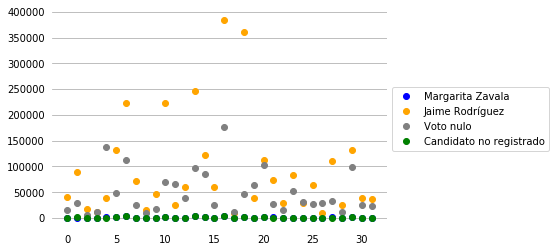

In [144]:
bar_color = ['blue', 'orange', 'grey', 'green']

ax_ind = df_independientes.plot(marker='o', linestyle='', color=bar_color)

L = ax_ind.legend(loc='center left', bbox_to_anchor=(1, 0.5))

L.get_texts()[0].set_text('Margarita Zavala')
L.get_texts()[1].set_text('Jaime Rodríguez')
L.get_texts()[2].set_text('Voto nulo')
L.get_texts()[3].set_text('Candidato no registrado')


ax_ind.spines['top'].set_visible(False)
ax_ind.spines['left'].set_visible(False)
ax_ind.spines['bottom'].set_visible(False)
ax_ind.spines['right'].set_visible(False)

ax_ind.tick_params(which='major', left=False, bottom=False) 

ax_ind.grid(True, axis='y')
ax_ind.set_axisbelow(True)

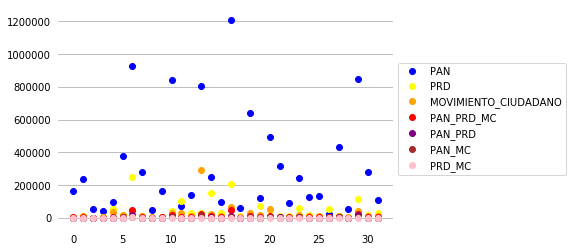

In [179]:
anaya_color = ['blue', 'yellow', 'orange', 'red', 'purple', 'brown', 'pink']

ax_anaya= df_anaya.plot(marker='o', linestyle='', color=anaya_color)


ax_anaya.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax_anaya.spines['top'].set_visible(False)
ax_anaya.spines['left'].set_visible(False)
ax_anaya.spines['bottom'].set_visible(False)
ax_anaya.spines['right'].set_visible(False)

ax_anaya.tick_params(which='major', left=False, bottom=False) 

ax_anaya.grid(True, axis='y')
ax_anaya.set_axisbelow(True)

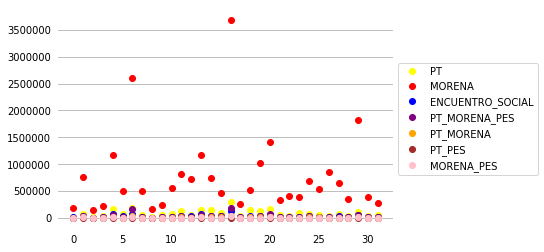

In [146]:
AMLO_color = ['yellow', 'red', 'blue', 'purple', 'orange', 'brown', 'pink']

ax_AMLO = df_AMLO.plot(marker='o', linestyle='', color=AMLO_color)

ax_AMLO.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax_AMLO.spines['top'].set_visible(False)
ax_AMLO.spines['left'].set_visible(False)
ax_AMLO.spines['bottom'].set_visible(False)
ax_AMLO.spines['right'].set_visible(False)

ax_AMLO.tick_params(which='major', left=False, bottom=False) 

ax_AMLO.grid(True, axis='y')
ax_AMLO.set_axisbelow(True)

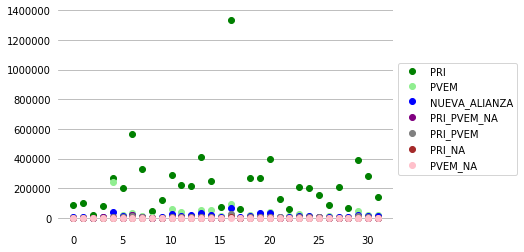

In [147]:
Meade_color= ['green', 'lightgreen', 'blue', 'purple', 'grey', 'brown', 'pink']

ax_Meade = df_Meade.plot(marker='o', linestyle='', color=Meade_color)

ax_Meade.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax_Meade.spines['top'].set_visible(False)
ax_Meade.spines['left'].set_visible(False)
ax_Meade.spines['bottom'].set_visible(False)
ax_Meade.spines['right'].set_visible(False)

ax_Meade.tick_params(which='major', left=False, bottom=False) 

ax_Meade.grid(True, axis='y')
ax_Meade.set_axisbelow(True)

# Try to get one dataset with the total votes for each candidate by country level and state level

In [236]:
conn.rollback()

In [172]:
all_results_Anaya = []

cursor = conn.cursor()
myquery = "SELECT sum(PAN) + sum(PRD) + sum(MOVIMIENTO_CIUDADANO) + sum(PAN_PRD_MC) + sum(PAN_PRD) + sum(PAN_MC) + sum(PRD_MC) FROM presidencial_limpia"
cursor.execute(myquery)
for row in cursor:
    results_all = row
    all_results_Anaya.append(results_all)

In [173]:
all_results_Anaya

[[12610120]]

In [ ]:
##do this until you've joined by state

all_results = []

cursor = conn.cursor()
myquery = "(SELECT sum(PAN) + sum(PRD) + sum(MOVIMIENTO_CIUDADANO) + sum(PAN_PRD_MC) + sum(PAN_PRD) + sum(PAN_MC) + sum(PRD_MC) FROM presidencial_limpia) as Anaya_sub "
cursor.execute(myquery)
for row in cursor:
    results_all = row
    all_results_Anaya.append(results_all)

In [200]:
##state level

all_results_Anaya = []

cursor = conn.cursor()
myquery = "SELECT ESTADO, sum(PAN) + sum(PRD) + sum(MOVIMIENTO_CIUDADANO) + sum(PAN_PRD_MC) + sum(PAN_PRD) + sum(PAN_MC) + sum(PRD_MC) FROM presidencial_limpia GROUP BY ESTADO"
cursor.execute(myquery)
for row in cursor:
    results_all = row
    all_results_Anaya.append(results_all)

In [201]:
col_names = ['estado', 'votos']
df_all_Anaya = pd.DataFrame.from_records(all_results_Anaya, columns=col_names)
df_all_Anaya

,estado,votos
0,AGUASCALIENTES,178988
1,BAJA CALIFORNIA,275503
2,BAJA CALIFORNIA SUR,56794
3,CAMPECHE,54417
4,CHIAPAS,198117
5,CHIHUAHUA,425919
6,CIUDAD DE M�XICO,1292623
7,COAHUILA,307590
8,COLIMA,56428
9,DURANGO,187947


In [237]:
all_results_Meade = []

cursor = conn.cursor()
myquery = "SELECT ESTADO, sum(PRI) + sum(PVEM) + sum(NUEVA_ALIANZA) + sum(PRI_PVEM_NA) + sum(PRI_PVEM) + sum(PRI_NA) + sum(PVEM_NA) FROM presidencial_limpia GROUP BY ESTADO"
cursor.execute(myquery)
for row in cursor:
    results_all = row
    all_results_Meade.append(results_all)

In [238]:
all_results_Meade
col_names = ['estado', 'votos']
df_all_Meade = pd.DataFrame.from_records(all_results_Meade, columns=col_names)
df_all_Meade

,estado,votos
0,AGUASCALIENTES,103639
1,BAJA CALIFORNIA,124225
2,BAJA CALIFORNIA SUR,28202
3,CAMPECHE,96584
4,CHIAPAS,562863
5,CHIHUAHUA,240725
6,CIUDAD DE M�XICO,652073
7,COAHUILA,358279
8,COLIMA,62004
9,DURANGO,141291


In [249]:
df_results = pd.merge(df_all_Anaya, df_all_Meade, on='estado', how='outer', suffixes=('_Anaya', '_Meade'))
df_results

,estado,votos_Anaya,votos_Meade
0,AGUASCALIENTES,178988,103639
1,BAJA CALIFORNIA,275503,124225
2,BAJA CALIFORNIA SUR,56794,28202
3,CAMPECHE,54417,96584
4,CHIAPAS,198117,562863
5,CHIHUAHUA,425919,240725
6,CIUDAD DE M�XICO,1292623,652073
7,COAHUILA,307590,358279
8,COLIMA,56428,62004
9,DURANGO,187947,141291


In [250]:
bronco_results = []

cursor = conn.cursor()
myquery = "SELECT ESTADO, sum(CAND_IND_02) FROM presidencial_limpia GROUP BY ESTADO;"

cursor.execute(myquery)
for row in cursor:
    results_bronco = row
    bronco_results.append(results_bronco)

In [251]:
col_names = ['estado', 'votos_Bronco']
df_all_Bronco = pd.DataFrame.from_records(bronco_results, columns=col_names)
df_all_Bronco

,estado,votos_Bronco
0,AGUASCALIENTES,40299
1,BAJA CALIFORNIA,89823
2,BAJA CALIFORNIA SUR,16766
3,CAMPECHE,11194
4,CHIAPAS,39607
5,CHIHUAHUA,132242
6,CIUDAD DE M�XICO,223261
7,COAHUILA,71051
8,COLIMA,15753
9,DURANGO,46009


In [252]:
df_results = pd.merge(df_results, df_all_Bronco, on='estado', how='outer')
df_results

,estado,votos_Anaya,votos_Meade,votos_Bronco
0,AGUASCALIENTES,178988,103639,40299
1,BAJA CALIFORNIA,275503,124225,89823
2,BAJA CALIFORNIA SUR,56794,28202,16766
3,CAMPECHE,54417,96584,11194
4,CHIAPAS,198117,562863,39607
5,CHIHUAHUA,425919,240725,132242
6,CIUDAD DE M�XICO,1292623,652073,223261
7,COAHUILA,307590,358279,71051
8,COLIMA,56428,62004,15753
9,DURANGO,187947,141291,46009


In [253]:
AMLO_results = []

cursor = conn.cursor()
myquery = "SELECT ESTADO, sum(PT) + sum(MORENA) + sum(ENCUENTRO_SOCIAL) + sum(PT_MORENA_PES) + sum(PT_MORENA) + sum(PT_PES) + sum(MORENA_PES) FROM presidencial_limpia GROUP BY ESTADO;"

cursor.execute(myquery)
for row in cursor:
    results_AMLO = row
    AMLO_results.append(results_AMLO)

In [254]:
col_names = ['estado', 'votos_AMLO']
df_all_AMLO = pd.DataFrame.from_records(AMLO_results, columns=col_names)
df_all_AMLO

,estado,votos_AMLO
0,AGUASCALIENTES,222528
1,BAJA CALIFORNIA,918939
2,BAJA CALIFORNIA SUR,193842
3,CAMPECHE,275262
4,CHIAPAS,1485699
5,CHIHUAHUA,643652
6,CIUDAD DE M�XICO,3118478
7,COAHUILA,609362
8,COLIMA,197316
9,DURANGO,340829


In [255]:
df_results = pd.merge(df_results, df_all_AMLO, on='estado', how='outer')
df_results.to_csv('total_votos_candidato_estado.csv', index=False)
df_results

,estado,votos_Anaya,votos_Meade,votos_Bronco,votos_AMLO
0,AGUASCALIENTES,178988,103639,40299,222528
1,BAJA CALIFORNIA,275503,124225,89823,918939
2,BAJA CALIFORNIA SUR,56794,28202,16766,193842
3,CAMPECHE,54417,96584,11194,275262
4,CHIAPAS,198117,562863,39607,1485699
5,CHIHUAHUA,425919,240725,132242,643652
6,CIUDAD DE M�XICO,1292623,652073,223261,3118478
7,COAHUILA,307590,358279,71051,609362
8,COLIMA,56428,62004,15753,197316
9,DURANGO,187947,141291,46009,340829


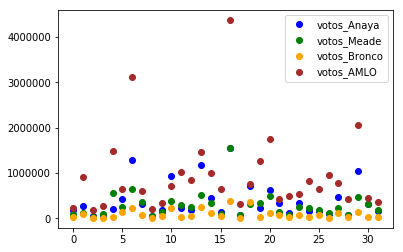

In [259]:
colors = ['blue', 'green', 'orange', 'brown']

df_results.plot(marker='o', linestyle='', color=colors)